In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import PIL

import os
for dirname, _, filenames in os.walk(r"C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\archive.zip
C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\annotations\maksssksksss0.xml
C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\annotations\maksssksksss1.xml
C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\annotations\maksssksksss10.xml
C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\annotations\maksssksksss100.xml
C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\annotations\maksssksksss101.xml
C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\annotations\maksssksksss102.xml
C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\annotations\maksssksksss103.xml
C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\annotations\maksssksksss104.xml
C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\annotations\maksssksksss105.xml
C:\Users\Kevem\OneDrive\Documents\GitHub\Face

In [2]:
img_dir = r"C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\images"
"""
annotation_directory contains files, and each file is associated to only one image,
and it contains the height and width of the image and also xmin,ymin,xmax, and ymax of each boundary box
inside the image
"""
annotation_dir = r"C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\annotations"

input_dir = r"C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\input"
output_dir = r"C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\output"

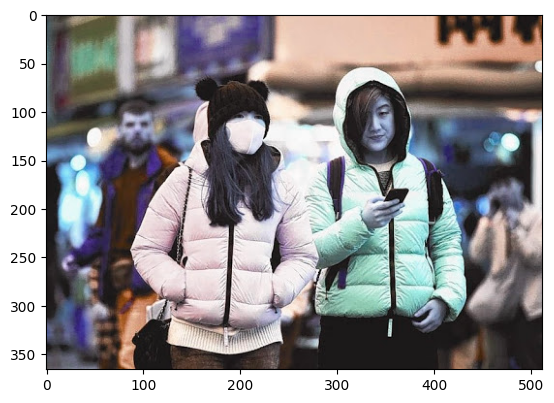

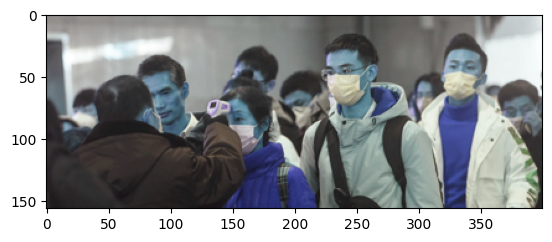

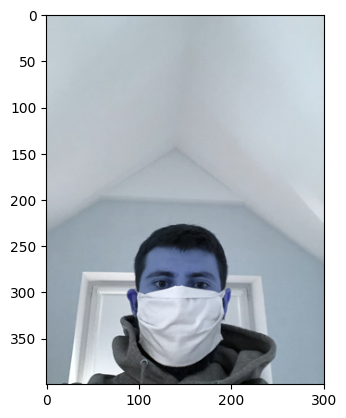

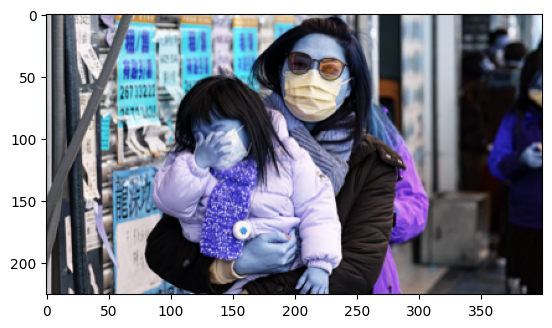

In [3]:
# sample visuaization
for idx, image in enumerate(os.listdir(img_dir)):
    img = cv2.imread(os.path.join(img_dir, image), 1)
    plt.imshow(img)
    plt.show()
    
    if idx == 3:
        break

In [4]:
img_file_path = []
for img in os.listdir(img_dir): # img here is the name of the image not the image itself
    image = cv2.imread(os.path.join(img_dir,img), 0) # 0 for grayscale
    img_file_path.append(f'{img}')

In [5]:
import xml.etree.ElementTree as ET 
"""
ElementTree module provides 
a way to work with Extensible Markup Language (XML) documents as a tree-like structure of elements.
"""
import glob

In [6]:
df = { 'name': [],
        'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}
"""
The glob.glob() function returns a list of all the pathnames that match the specified pattern.
The resulting list can then be used to process or analyze the files that match the pattern.
"""
for idx, anno in enumerate(glob.glob(annotation_dir + '/*.xml')):
    trees = ET.parse(anno)
    
    #print(anno) print/view the annotation to understand the following code
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width = int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))
                    
        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]] 
                    df['name'] += [os.path.basename(anno).split('.')[0]]
                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]
                            
                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

In [7]:
df1 = pd.DataFrame(df)
df1.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,maksssksksss0,without_mask,512,366,79,105,109,142
1,maksssksksss0,with_mask,512,366,185,100,226,144
2,maksssksksss0,without_mask,512,366,325,90,360,141
3,maksssksksss1,with_mask,400,156,321,34,354,69
4,maksssksksss1,with_mask,400,156,224,38,261,73


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4072 non-null   object
 1   label   4072 non-null   object
 2   width   4072 non-null   int64 
 3   height  4072 non-null   int64 
 4   xmin    4072 non-null   int64 
 5   ymin    4072 non-null   int64 
 6   xmax    4072 non-null   int64 
 7   ymax    4072 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 254.6+ KB


In [9]:
label_map = { 'without_mask': 0,
            'with_mask': 1,
            'mask_weared_incorrect': 2}

df1['class'] = df1['label'].map(label_map)

In [10]:
df1.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class
0,maksssksksss0,without_mask,512,366,79,105,109,142,0
1,maksssksksss0,with_mask,512,366,185,100,226,144,1
2,maksssksksss0,without_mask,512,366,325,90,360,141,0
3,maksssksksss1,with_mask,400,156,321,34,354,69,1
4,maksssksksss1,with_mask,400,156,224,38,261,73,1


In [11]:
# split train, test, val data
from sklearn.model_selection import train_test_split

train, test = train_test_split(img_file_path, test_size=0.2, random_state=101)
train, val = train_test_split(train, test_size=0.15, random_state=101)

In [12]:
# yolo v5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

c:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.
C:\Users\Kevem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Defaulting to user installation because normal site-packages is not writeable


In [13]:
os.chdir(r'C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector')
"""
The os.chdir() function is used to change the working directory
of the Python script to the specified path.
"""
os.mkdir('./yolov5/data/train')
os.mkdir('./yolov5/data/val')
os.mkdir('./yolov5/data/test')
os.mkdir('./yolov5/data/train/images')
os.mkdir('./yolov5/data/train/labels')
os.mkdir('./yolov5/data/val/images')
os.mkdir('./yolov5/data/val/labels')
os.mkdir('./yolov5/data/test/images')
os.mkdir('./yolov5/data/test/labels')


FileExistsError: [WinError 183] Cannot create a file when that file already exists: './yolov5/data/train'

In [14]:
def open_image_file(image_items, folder_name):
    
    for image in image_items:
        img = PIL.Image.open(f'{img_dir}/{image}')
        img1 = img.resize((640, 480))
        _ = img1.save(f'{output_dir}/yolov5/data/{folder_name}/images/{image}')

open_image_file(train, 'train')
open_image_file(val, 'val')
open_image_file(test, 'test')

In [15]:
df1['xmin'] = (640/df1['width']) * df1['xmin']
df1['ymin'] = (480/df1['height']) * df1['ymin']
df1['xmax'] = (640/df1['width']) * df1['xmax']
df1['ymax'] = (480/df1['height']) * df1['ymax']
df1.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class
0,maksssksksss0,without_mask,512,366,98.75,137.704918,136.25,186.229508,0
1,maksssksksss0,with_mask,512,366,231.25,131.147541,282.50,188.852459,1
2,maksssksksss0,without_mask,512,366,406.25,118.032787,450.00,184.918033,0
3,maksssksksss1,with_mask,400,156,513.60,104.615385,566.40,212.307692,1
4,maksssksksss1,with_mask,400,156,358.40,116.923077,417.60,224.615385,1


In [16]:
df1[['xmin', 'ymin', 'xmax', 'ymax']] = df1[['xmin', 'ymin', 'xmax', 'ymax']].astype('int')

In [17]:
WIDTH = 640
HEIGHT = 480

In [18]:
df1['x_center'] = (df1['xmin']+df1['xmax'])/(2*WIDTH)
df1['y_center'] = (df1['ymin']+df1['ymax'])/(2*HEIGHT)
df1['box_width'] = (df1['xmax']-df1['xmin'])/ WIDTH
df1['box_height'] = (df1['ymax']-df1['ymin'])/ HEIGHT

In [19]:
df1.head()


,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,maksssksksss0,without_mask,512,366,98,137,136,186,0,0.182812,0.336458,0.059375,0.102083
1,maksssksksss0,with_mask,512,366,231,131,282,188,1,0.400781,0.332292,0.079687,0.118750
2,maksssksksss0,without_mask,512,366,406,118,450,184,0,0.668750,0.314583,0.068750,0.137500
3,maksssksksss1,with_mask,400,156,513,104,566,212,1,0.842969,0.329167,0.082812,0.225000
4,maksssksksss1,with_mask,400,156,358,116,417,224,1,0.605469,0.354167,0.092188,0.225000


In [20]:
df1 = df1.astype(str)

In [21]:
img_file_path[:5]

['maksssksksss0.png',
 'maksssksksss1.png',
 'maksssksksss10.png',
 'maksssksksss100.png',
 'maksssksksss101.png']

In [22]:
output_test = r'C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector'
def copy_label(label_items, folder_name):
    file_name = [x.split('.')[0] for x in img_file_path]
    for name in file_name:
        data = df1[df1.name == name]
        box_list = []
        for idx in range(len(data)):
            row = data.iloc[idx]
            box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

        text = "\n".join(box_list)
        with open(f'{output_test}/yolov5/data/{folder_name}/labels/{name}.txt', 'w') as file:
            file.write(text)

In [23]:
copy_label(train, 'train')
copy_label(val, 'val')
copy_label(test, 'test')

In [24]:
os.chdir(r"C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\yolov5\data\train\labels")

In [25]:
with open('maksssksksss0.txt', 'r') as file:
	content = file.read()
	print(content)

0 0.1828125 0.33645833333333336 0.059375 0.10208333333333333
1 0.40078125 0.33229166666666665 0.0796875 0.11875
0 0.66875 0.3145833333333333 0.06875 0.1375


In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 4070 Ti


In [4]:
from IPython.display import Image as Display



Using device: cuda


In [5]:
!python "C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\yolov5\train.py" --img 640 --epochs 50 --batch 32 --data "C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\Output\yolov5\data\data.yaml" --weights yolov5s.pt --cache --device 0


train: weights=yolov5s.pt, cfg=, data=C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\Dataset\Output\yolov5\data\data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-392-gf003c3df Python-3.12.8 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.93

In [6]:
from IPython.display import Image as Display

In [7]:
Display(filename=r'C:\Users\Kevem\OneDrive\Documents\GitHub\FaceMaskDetector\yolov5\runs\train\exp\results.png', width=1080)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Kevem\\OneDrive\\Documents\\GitHub\\FaceMaskDetector\\yolov5\\runs\\train\\exp\\results.png'